# TEXT SUMMARIZATION


*   Syed Mudassir Hussain (sh7240) 
*   Pratham Mehta (pm3483)




## Background

Introduction

In this notebook we will be doing analysis on Pegasus transformer for Text Summarization.
1.   **Extractive Summary:** The network calculates the most important sentences from the article and gets them together to provide the most meaningful information from the article.
2.   **Abstract Summary:** The network creates new sentences to encapsulate maximum gist of the article and generates that as output. The sentences in the summary may or may not be contained in the article.

We will be focusing on Abstract Summary. 

PEGASUS is the latest state-of-the-art model for abstractive summarization open-sourced by Google, recently in June 2020. It stands for Pre-training with Extracted Gap-sentences for Abstractive SUmmarization Sequence-to-sequence models. 

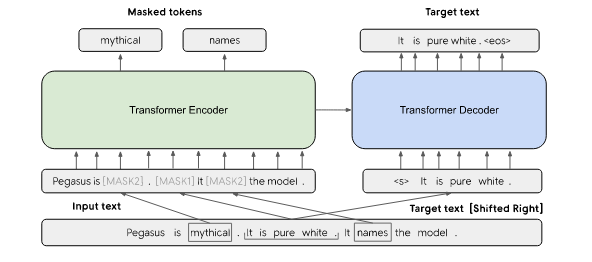



**PEGASUS: Pre-training with Extracted Gap-Sentences for Abstractive Summarization.**

PEGASUS uses the seq2seq architecture much like any other activity that involves sequence transduction. The new aspect of this architecture is its self-supervised pre-training goal. This aim's core premise is that the closer the pre-training self-supervised objective is to the downstream task's end result, the better the fine-tuning performance will be.

As a result, whole sentences are "masked" in PEGASUS so that the model can be taught to predict them. This is demonstrated in the figure. The authors acknowledge that this endeavor appears to be practically insurmountable, even for humans. However, such training results in the development of sentences that have an example from the original document, confirming their assumption. GSG stands for "Gap Sentence Generation". The authors claim that the optimal method for masking is to pick the most significant sentences from the document. This is accomplished by identifying sentences that, using a metric called ROUGE, are most similar to the entire document.

The combination of both MLM and GSG are applied simultaneously as pre-training objectives. Let's assume there are three sentenses, then one sentence is masked with [MASK1] and used as target generation text (GSG), and the other two sentences remain in the input, but some words are randomly masked by [MASK2] (MLM).

## Understanding PEGASUS - encoder and decoder.

PEGASUS performs sequence-to-sequence learning using an encoder-decoder model at the highest level. A context vector, which is essentially a numerical representation of the input text, is created by the encoder in such a model by first taking into account the context of the entire input text. The decoder, whose task it is to decode the context vector to produce the summary, will then receive this numerical representation.

The authors in the article has mentioned about the pre-training of the model to output important sentences is suitable as it closely resembles what abstraction needs to be. Using metrices like ROUGE1-F1, the authors where able to automate the selection of important sentences.

ROUGE, or Recall-Oriented Understudy for Gisting Evaluation, is a set of metrics and a software package used for evaluating automatic summarization and machine translation software in natural language processing. The metrics compare an automatically produced summary or translation against a reference or a set of references (human-produced) summary or translation. -HuggingFace


## Working with the existing code

Below is code given at the starting point:
Source: https://chetanambi.medium.com/generate-summaries-using-googles-pegasus-library-772633a161c2

In [ ]:
!git clone https://github.com/huggingface/transformers  #cloning tranformers repo from github
%cd transformers
!pip3 install .           #installing all the requirements
!pip3 install SentencePiece

Cloning into 'transformers'...
remote: Enumerating objects: 124902, done.
remote: Counting objects: 100% (341/341), done.
remote: Compressing objects: 100% (181/181), done.
remote: Total 124902 (delta 165), reused 267 (delta 136), pack-reused 124561
Receiving objects: 100% (124902/124902), 119.55 MiB | 11.43 MiB/s, done.
Resolving deltas: 100% (93675/93675), done.
/content/transformers
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/transformers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 96.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.5 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.27.0.dev0-py3-none-any.whl size=6335206 sha256=0a3dba5553eda03c483e5d57834872f65b780b8991c38c4a52785a5382de0e38
  Stored in di

In [ ]:
!git pull
!pip3 install --upgrade .
!pip3 install datasets

Already up to date.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/transformers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.27.0.dev0-py3-none-any.whl size=6335206 sha256=64a43cc5d41b856da5d241a6cef9883949ec48a2827192bc6b2e167b5dd7fca0
  Stored in directory: /tmp/pip-ephem-wheel-cache-eoa9vr2x/wheels/15/57/14/0d2873a0295966ca166ea9d9225761a50cce27e4d6b0341fcc
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.27.0.dev0
    Uninstalling transformers-4.27.0.dev0:
      Successfully uninstalled transformers-4.27.0.dev0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 33.4 MB/s eta 0:00:00
     ━━━━━━

In [ ]:
import gc
gc.collect()

3

In [ ]:
src_text = [ """
Moscow: President Vladimir Putin on Tuesday called for a joint effort by the BRICS countries on the development of the coronavirus vaccines as he suggested that Russia's Sputnik V vaccine against COVID-19 could be produced in China and India, which are members of the five-nation bloc.
"We believe it is important to speed up the establishment of the centre for development and research of BRICS vaccines, which we agreed to do two years ago, upon the initiative of our South African friends," Mr Putin said while addressing the 12th BRICS summit via videoconferencing.

The summit, hosted by President Putin, was attended by Prime Minister Narendra Modi, Chinese President Xi Jinping, Brazilian President Jair Bolsonaro and South African President Cyril Ramaphosa.

Mr Putin said that Russia's Sputnik V vaccine that was registered in August could be produced in China and India, both members of the BRICS, Sputniknews reported.

"The Russian Direct Investment Fund has reached agreements with its Brazilian and Indian partners on conducting clinical trials of the Sputnik V vaccine, it has also reached an agreement with pharmaceutical companies in China and India to launch production of the vaccine in these countries not just to cover their needs, but for third countries as well," Mr Putin said.

On August 11, Russia became the world's first country to register a coronavirus vaccine, dubbed Sputnik V. The vaccine was developed by the Gamaleya Research Institute, while the Russian Direct Investment Fund (RDIF) is investing in the production and promotion of the vaccine abroad. Another Russian vaccine, EpiCoronaVac, produced by Vector Research Centre, was registered in October.

President Putin at the time said that the Sputnik V works "quite effectively" and forms a "stable immunity" against the deadly disease. He had disclosed that one of his daughters had tested a Russian COVID-19 vaccine on herself and that she is feeling well.

Sputnik V vaccine has shown 92 per cent efficacy in preventing COVID-19, according to interim trial results announced by the country's health ministry last week.

The vaccine has been named Sputnik-V. The name is a reference to the surprise 1957 launch of the world's first satellite by the Soviet Union.

The 12th BRICS summit was originally scheduled to be held in Saint Petersburg in July but had to be postponed due to the outbreak of the global COVID-19 pandemic.

So far the coronavirus has infected more than 54 million people around the world and killed more than 1.3 million people even as governments implemented strict lockdowns and restrictions to slow the spread of the virus that originated in the Chinese city of Wuhan.

A second wave of infections is threatening to derail economies and impact lives again as countries have gradually begun to ease restrictions and open up.

The BRICS (Brazil-Russia-India-China-South Africa) is known as an influential bloc that represents over 3.6 billion people, or half of the world's population. The BRICS countries have a combined GDP of USD 16.6 trillion.
"""          
]

In [ ]:
src_text1= ["""Considering the revolutionary changes blockchain and Web3 are bringing to our digital worlds, it is important for current users and interested parties to know their strengths and weaknesses.

Scalability: This is an important advantage of a digital Web3 economy. This is where Ethereum’s shift to the PoS validation model comes into play.

Essentially, PoW validation requires systems that are able to run complex algorithms and code to validate data points on the blockchain. This is not only time-consuming but is also highly power-intensive!

A PoS-based blockchain, however, requires only a “stake” of cryptocurrency to be validated. Every user on the network thus stakes their tokens on the blockchain, and acts as a point of validation for all of its data."""]

In [ ]:
import torch
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
#model used is google/pegasus-reddit_tifu
model_name = 'google/pegasus-reddit_tifu'
tokenizer = PegasusTokenizer.from_pretrained(model_name)        #preparing inputs for the model 
model = PegasusForConditionalGeneration.from_pretrained(model_name).to('cpu')
batch = tokenizer.prepare_seq2seq_batch(src_text1, truncation=True, padding='longest', return_tensors="pt").to('cpu')
translated = model.generate(**batch)      #output summary
tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:3707: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and targets.

Here is a short example:

model_inputs = tokenizer(src_texts, text_target=tgt_texts, ...)

If you either need to use different keyword arguments for the source and target texts, you should do two calls like
this:

model_inputs = tokenizer(src_texts, ...)
labels = tokenizer(text_target=tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)
/usr/local/lib/python3.8/dist-packages/transformers/generation/utils.py:1276: UserWarning: Neither `max_length` nor `max_new_toke

In [ ]:
tgt_text[0]


'Blockchains and Web3 are changing the way we do business, and it’s important to know your strengths and weaknesses so you can make informed decisions.'

In [ ]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from transformers import pipeline, set_seed
from datasets import load_dataset
from nltk.tokenize import sent_tokenize
from datasets import load_dataset, load_metric
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

In [ ]:
nltk.download("punkt")
dataset = load_dataset("cnn_dailymail", version="3.0.0")
print(f"Features: {dataset['train'].column_names}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset cnn_dailymail downloaded and prepared to /root/.cache/huggingface/datasets/cnn_dailymail/default/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Features: ['article', 'highlights', 'id']


In [ ]:
sample = dataset["train"][1]
print(f"""Article (excerpt of 500 characters, total length: {len(sample["article"])}):""")
print(sample["article"][:500])
print(f'\nSummary (length: {len(sample["highlights"])}):')
print(sample["highlights"])

Article (excerpt of 500 characters, total length: 4051):
Editor's note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most s

Summary (length: 281):
Mentally ill inmates in Miami are housed on the "forgotten floor"
Judge Steven Leifman says most are there as a result of "avoidable felonies"
While CNN tours facility, patient shouts: "I am the son of the president"
Leifman says the system is unjust and he's fighting for change .


In [ ]:
#  restricting the input text to 2000 characters 
sample_text = dataset["train"][1]["article"][:2000]
# generated summaries of each model in a dict
summaries = {}

In [ ]:
def three_sentence_summary(text):
    return "\n".join(sent_tokenize(text)[:3])

In [ ]:
summaries["baseline"] = three_sentence_summary(sample_text)

In [ ]:
pipe = pipeline("summarization", model="t5-small")
pipe_out = pipe(sample_text)
summaries["t5"] = "\n".join(sent_tokenize(pipe_out[0]["summary_text"]))

Downloading:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/242M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-small automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/generation/utils.py:1134: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon

In [ ]:
summaries["t5"] 

"inmates with most severe mental illnesses are incarcerated until they're ready to appear in court .\nmost often, they face drug charges or charges of assaulting an officer .\nthey end up on the ninth floor severely mentally disturbed, but not getting real help ."

In [ ]:
pipe = pipeline("summarization", model="google/pegasus-cnn_dailymail")
pipe_out = pipe(sample_text)
summaries["pegasus"] = pipe_out[0]["summary_text"].replace(" .<n>", ".\n")

Downloading:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

In [ ]:
summaries["pegasus"]

'Mentally ill inmates in Miami are housed on the "forgotten floor"<n>The ninth floor is where they\'re held until they\'re ready to appear in court.\nMost often, they face drug charges or charges of assaulting an officer.\nThey end up on the ninth floor severely mentally disturbed .'

In [ ]:
print("Given highlight")
print(dataset["train"][1]["highlights"])
print("")

for model_name in summaries:
    print(model_name.upper())
    print(summaries[model_name])
    print("")

Given highlight
Mentally ill inmates in Miami are housed on the "forgotten floor"
Judge Steven Leifman says most are there as a result of "avoidable felonies"
While CNN tours facility, patient shouts: "I am the son of the president"
Leifman says the system is unjust and he's fighting for change .

BASELINE
Editor's note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events.
Here, Soledad O'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial.
MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor."

T5
inmates with most severe mental illnesses are incarcerated until they're ready to appear in court .
most often, they face drug charges or charges of assaulting an officer .
they end up on the ninth floor severely ment

In [ ]:
!pip3 install rouge_score
rouge_metric = load_metric("rouge")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24955 sha256=d479f45e17f3b15d1afeae7ac21d624fe65f81c65d9cd1562883ae41b76de894
  Stored in directory: /root/.cache/pip/wheels/24/55/6f/ebfc4cb176d1c9665da4e306e1705496206d08215c1acd9dde
Successfully built rouge-score


In [ ]:
reference = dataset["train"][1]["highlights"]
records = []
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

for model_name in summaries:
    rouge_metric.add(prediction=summaries[model_name], reference=reference)
    score = rouge_metric.compute()
    rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
    records.append(rouge_dict)
pd.DataFrame.from_records(records, index=summaries.keys())

,rouge1,rouge2,rougeL,rougeLsum
baseline,0.365079,0.145161,0.206349,0.285714
t5,0.195652,0.022222,0.108696,0.173913
pegasus,0.323232,0.206186,0.282828,0.323232


In [ ]:
test_sampled = dataset["test"].shuffle(seed=42).select(range(500))

In [ ]:
from tqdm import tqdm
import torch

device = torch.device("cuda") if torch.cuda.is_available() else "cpu"

def evaluate_summaries_pegasus(dataset, metric, model, tokenizer,
                               device=device, column_text="article", 
                               column_summary="highlights"):
    articles = dataset[column_text]
    target = dataset[column_summary]
    count = 0
    for article, target in (zip(articles, target)):
        batch = tokenizer.prepare_seq2seq_batch(article, truncation=True, padding='longest', return_tensors="pt").to('cuda')
        translated = model.generate(**batch)
        decoded_summary = tokenizer.batch_decode(translated, skip_special_tokens=True)
        metric.add(predictions = decoded_summary, references=target)
        count = count+1
        print(count)
    score = metric.compute()
    return score

In [ ]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
model_ckpt = "google/pegasus-cnn_dailymail"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt).to("cuda")
score = evaluate_summaries_pegasus(test_sampled, rouge_metric, 
                                   model, tokenizer)
rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
pd.DataFrame(rouge_dict, index=["pegasus"])

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:3704: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and targets.

Here is a short example:

model_inputs = tokenizer(src_texts, text_target=tgt_texts, ...)

If you either need to use different keyword arguments for the source and target texts, you should do two calls like
this:

model_inputs = tokenizer(src_texts, ...)
labels = tokenizer(text_target=tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


,rouge1,rouge2,rougeL,rougeLsum
pegasus,0.427446,0.209187,0.304762,0.366634


I also tried implementing the fine-tuning with low resource summarization on Xsum dataset. The below implmentation is under two stages, first in which we prepare data and the other one in which we prepare fine tuning. In the preparation of fine tuning we create a trainer and it needs some arguments to be passed `training_args` basically hold all the params. For model, I have chosen Pegasus Large on which we are doing fine tuning. 

I tried running the trainer to train but it runs out of memory if I increase the batch size and which small batch size like 1-2, it will take forever to train the model. We can run this on premium GPU and with more memory. 


The below section was inpired from Jiahao Weng.

In [ ]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer, Trainer, TrainingArguments
import torch
torch.cuda.empty_cache()


class PegasusDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels['input_ids'][idx])
        print(item)
        return item
    def __len__(self):
        return len(self.labels['input_ids'])

      
def prepare_data(model_name, 
                 train_texts, train_labels, 
                 val_texts=None, val_labels=None, 
                 test_texts=None, test_labels=None):

  tokenizer = PegasusTokenizer.from_pretrained(model_name)

  prepare_val = False if val_texts is None or val_labels is None else True
  prepare_test = False if test_texts is None or test_labels is None else True

  def tokenize_data(texts, labels):
    encodings = tokenizer(texts, truncation=True, padding=True)
    decodings = tokenizer(labels, truncation=True, padding=True)
    dataset_tokenized = PegasusDataset(encodings, decodings)
    return dataset_tokenized

  train_dataset = tokenize_data(train_texts, train_labels)
  val_dataset = tokenize_data(val_texts, val_labels) if prepare_val else None
  test_dataset = tokenize_data(test_texts, test_labels) if prepare_test else None

  return train_dataset, val_dataset, test_dataset, tokenizer


def prepare_fine_tuning(model_name, tokenizer, train_dataset, val_dataset=None, freeze_encoder=False, output_dir='./results'):

  # torch.cuda.set_device(1)

  # torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'
  # print(torch_device)
  model = PegasusForConditionalGeneration.from_pretrained(model_name).to('cuda')

  if freeze_encoder:
    for param in model.model.encoder.parameters():
      param.requires_grad = False
  torch.cuda.set_device(0)

  if val_dataset is not None:
    training_args = TrainingArguments(
      output_dir=output_dir,           # output directory
      num_train_epochs=2000,           # total number of training epochs
      per_device_train_batch_size=2,   # batch size per device during training, can increase if memory allows
      per_device_eval_batch_size=2,    # batch size for evaluation, can increase if memory allows
      save_steps=500,                  # number of updates steps before checkpoint saves
      save_total_limit=5,              # limit the total amount of checkpoints and deletes the older checkpoints
      evaluation_strategy='steps',     # evaluation strategy to adopt during training
      eval_steps=100,                  # number of update steps before evaluation
      warmup_steps=500,                # number of warmup steps for learning rate scheduler
      weight_decay=0.01,               # strength of weight decay
      logging_dir='./logs',            # directory for storing logs
      logging_steps=10,
      predict_with_generate=True
    )

    trainer = Trainer(
      model=model,                         
      args=training_args,                  
      train_dataset=train_dataset,         
      eval_dataset=val_dataset,            
      tokenizer=tokenizer
    )

  else:
    training_args = TrainingArguments(
      output_dir=output_dir,           
      num_train_epochs=2000,           
      per_device_train_batch_size=2,   
      save_steps=500,                  
      save_total_limit=5,              
      warmup_steps=500,                
      weight_decay=0.01,               
      logging_dir='./logs',            
      logging_steps=10,
    )

    trainer = Trainer(
      model=model,                         
      args=training_args,                 
      train_dataset=train_dataset,         # training dataset
      tokenizer=tokenizer
    )

  return trainer


if __name__=='__main__':
  # using xsum dataset
  from datasets import load_dataset
  dataset = load_dataset("xsum")
  #using 1000 examples
  train_texts, train_labels = dataset['train']['document'][:1000], dataset['train']['summary'][:1000]
  
  model_name = 'google/pegasus-large'
  train_dataset, _, _, tokenizer = prepare_data(model_name, train_texts, train_labels)
  trainer = prepare_fine_tuning(model_name, tokenizer, train_dataset)
  old_collator = trainer.data_collator
  trainer.data_collator = lambda data: dict(old_collator(data))
  trainer.train()


## Validating a claim
The claim given in the paper: That the experiments demonstrate it achieves state-of-the-art performance on all 12 downstream datasets measured
by ROUGE scores.
We decided to validate the claim rouge scores of Pegasus with of the 12 downstream datasets, we chose cnn_dailymail. The whole discussion around Pegasus is regarding its perforance compared to previous SOTA. And, evaluating on of the 12 datastreams would cement the rouge scores present in the paper. Also, I wanted to understand the rouge score distribution. I also compare one test case with t5 and pegasus. 
I tested the pegasus model with 500 cnn_dailymail test samples because the computation takes quite a lot of time, but the result are promising compared to the numbers present in the paper. <br> 
<u>My Experiment </u>: <br>

Rouge1 | Rouge2 | Rougel
--- | --- | ---
0.4274463656674534 | 0.20918651606503325 | 0.3047616168591998

<br>

<u>Author's Experiment</u>: <br>

Rouge1 | Rouge2 | Rougel
--- | --- | ---
0.4390 | 0.2120 | 0.4076

Rouge1 refers to the overlap of unigram between the system and reference summary. 
Rouge2 refers to the bigram between the system and reference summary.
Rougel refers to the longest common subsequence between the two.

The unigrams between the system and reference summary have a score of 43% that means the overlap between the same. And the score is good and similar to what paper has.
The bigrams between the system and reference summary have 21% overlap which is not high as rouge1 but it similar to what paper claims.
As I mentioned, the rouge1 and rouge2 values are similar but the overall rougel is not. My hypothesis is because of lesser samples, 500 samples are relatively way lesser. Overall Rougel would increase if we pass the model with more articles.

We used to references to understand the implementation and reasonings. We went through HuggingFace tutorials, discussions on stackoverflow and medium aricles.

## References


https://arxiv.org/pdf/1912.08777.pdf - This the given paper that we have refered <br>
https://github.com/huggingface/transformers - To get syntax and coding implementation of Pegasus<br>
https://gist.github.com/chetanambi/cb930bdd13202003192aba19b5faff28#file-pegasus_abstractivesummaries-ipynb - Explanation on abstract transformers and first level of summary generation<br>
https://huggingface.co/google/pegasus-large - Going through the tokenizer and model creation<br>
https://github.com/huggingface/datasets/blob/main/metrics/rouge/rouge.py - To understand how it works <br>
https://towardsdatascience.com/how-to-perform-abstractive-summarization-with-pegasus-3dd74e48bafb - I refered hi s medium blog to understand the fine-tuning<br>